In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import RandomizedSearchCV
import pickle

In [3]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [4]:
df= pd.read_csv("cleaned_claims_dataset.csv")

In [5]:
df.describe(include='all')

,Gender,Age,Driving_License,Annual_Premium,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Region_Code_0,Region_Code_1,Region_Code_2,...,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Previously_Insured,Previous_Vehicle_Damage,Response
count,382154.000000,382154.000000,382154.000000,3.821540e+05,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,...,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000
mean,0.538011,0.285318,0.998108,5.410592e-17,0.523810,0.435304,0.040887,0.004812,0.002460,0.009742,...,0.003281,0.026445,0.017634,0.001287,0.000136,0.055069,0.007777,0.489182,0.480573,0.163811
std,0.498554,0.234260,0.043455,1.000001e+00,0.499433,0.495797,0.198028,0.069203,0.049535,0.098220,...,0.057190,0.160454,0.131618,0.035858,0.011664,0.228116,0.087844,0.499884,0.499623,0.370104
min,0.000000,0.000000,0.000000,-1.645878e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.076923,1.000000,-3.613542e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.246154,1.000000,5.748172e-02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.446154,1.000000,5.120559e-01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,2.985972e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.columns = df.columns.str.replace('<', 'lt_').str.replace('>', 'gt_').str.replace(' ', '')

In [7]:
df.head()

,Gender,Age,Driving_License,Annual_Premium,Vehicle_Age_1-2Year,Vehicle_Age_lt_1Year,Vehicle_Age_gt_2Years,Region_Code_0,Region_Code_1,Region_Code_2,...,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Previously_Insured,Previous_Vehicle_Damage,Response
0,1,0.030769,1,-1.645878,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0.338462,1,0.739424,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0.707692,1,0.300660,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0.030769,1,-0.179718,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0.123077,1,-0.098952,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
# Check for Class Imbalance in the Target Variable 'Response'
df['Response'].value_counts()

,count
Response,
0,319553
1,62601


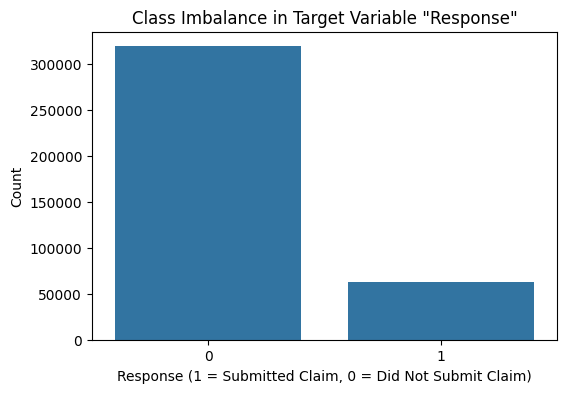

In [9]:
# Visualize Class Imbalance
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Response')
plt.title('Class Imbalance in Target Variable "Response"')
plt.xlabel('Response (1 = Submitted Claim, 0 = Did Not Submit Claim)')
plt.ylabel('Count')
plt.show()

In [10]:
# Prepare the data for modeling
X = df.drop(['Response'],axis=1)  # Features
y = df['Response']  # Target variable

In [11]:
#This function is used for:
#1) Train Test splitting the dataset & model fitting
#2) Hyperparmeter tuning the model using RandomizedSearchCV,
#3) Generating the classfiication report and Confusion Matrix
#4) Storing the model state as a pickle file
#5) Getting the best set of Hyperparameters

#6) Getting Classification Report for Training set
#7) Getting Classification Report for Testing set

#8) Getting Confusion Matrix for Training set
#9) Getting Confusion Matrix for Testing set

#10) Getting ROC Area Under the Curve Score for Training set
#11) Getting ROC Area Under the Curve Score for Testing set
#12) Plotting ROC Curve

#13) Getting Precision-Recall Curve Area Under the Curve Score for Training set
#14) Getting Precision-Recall Curve  Area Under the Curve Score for Testing set
#15) Plotting Precision-Recall Curve
def Model_Driver_Function(X,Y,algo_name,algorithm,gridSearchParams,cv,n_iter):

    #Setting the random seed to 101
    np.random.seed(101)
    #Train test splitting the data in 70:30 ratio
    x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.3)


    #Using Grid serach for hyper-parameter tuning the model
    RandomizedSearchCV_grid = RandomizedSearchCV(
        estimator=algorithm,
        param_distributions=gridSearchParams,
        cv=cv, scoring='f1', verbose=1, n_jobs=-1,n_iter=n_iter,random_state=101)


    #Fitting the model
    RandomizedSearch_result = RandomizedSearchCV_grid.fit(x_train, y_train)


    #getting best parameters
    best_params = RandomizedSearch_result.best_params_

    #Getting the prediction against the Test Set
    prediction_test = RandomizedSearch_result.predict(x_test)

    #Getting the prediction against the Train Set
    prediction_train = RandomizedSearch_result.predict(x_train)

    #Getting the confusion matrix for training set
    cm_train = confusion_matrix(y_train, prediction_train)

    #Getting the confusion matrix for testing set
    cm_test = confusion_matrix(y_test, prediction_test)

    #Storing the model state into a pickle file
    pickle.dump(RandomizedSearch_result,open(algo_name,'wb'))


    print('\n\n')
    print('==============================================================================================')
    print('Best Model Hyper-parameters :',best_params)


    print('\n\n')
    print('==============================================================================================')
    print('Classification Report For Training set : \n',classification_report(y_train,prediction_train))

    print('\n\n')
    print('==============================================================================================')
    print('Classification Report For Testing set : \n',classification_report(y_test,prediction_test))

    print('\n\n')
    print('==============================================================================================')
    print('Confusion Matrix for Training Set :\n', cm_train)

    print('\n\n')
    print('==============================================================================================')
    print('Confusion Matrix for Testing Set :\n', cm_test)

    print('\n\n')
    print('==============================================================================================')
    # calculating Area Under the Curve scores for Training set
    model_auc_train = roc_auc_score(y_train, prediction_train)
    print('ROC Area Under the Curve Score for Training set:', model_auc_train)

    print('\n\n')
    print('==============================================================================================')
    # calculating Area Under the Curve scores for Testing set
    model_auc_test = roc_auc_score(y_test, prediction_test)
    print('ROC Area Under the Curve Score for Testing set:', model_auc_test)

    print('\n\n')
    print('==============================================================================================')
    # calculating the ROC curves
    Model_False_Positive_Rate, Model_True_Positive_Rate, _ = roc_curve(y_test, prediction_test)

    print('\n\n')
    print('==============================================================================================')
    # plotting the roc curve for the model
    print("ROC Curve")
    plt.figure(figsize=(12,8))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='No SKill')
    label_string=algo_name+'(AUC = %0.3f)' % model_auc_test
    plt.plot(Model_False_Positive_Rate, Model_True_Positive_Rate, marker='.', label=label_string, color='orange')

    plt.xlabel('False Positive Rate',fontsize=15)
    plt.ylabel('True Positive Rate',fontsize=15)
    plt.legend()
    plt.show()

    print('\n\n')
    print('==============================================================================================')
    # calculating Area Under the Curve scores for Training set

    # calculating the Precision and Recall scores for different thresholds
    model_precision_train, model_recall_train, model_thresholds_train = precision_recall_curve(y_train, prediction_train)
    # calculate scores
    model_pr_auc_train = auc(model_recall_train, model_precision_train)
    print('Precision-Recall Area Under the Curve Score for Training set:', model_pr_auc_train)

    print('\n\n')
    print('==============================================================================================')
    # calculating Area Under the Curve scores for Testing set

    # calculating the Precision and Recall scores for different thresholds
    model_precision_test, model_recall_test, model_thresholds_test = precision_recall_curve(y_test, prediction_test)
    # calculate scores
    model_pr_auc_test= auc(model_recall_test, model_precision_test)
    print('Precision-Recall Area Under the Curve Score for Testing set:', model_pr_auc_test)

    print('\n\n')
    print('==============================================================================================')
    # plotting the roc curve for the model
    print("Precision- Recall Curve")
    plt.figure(figsize=(12,8))
    no_skill = len(y_test[y_test==1]) / len(y_test)
    plt.plot([0, 1], [no_skill, no_skill], color='darkblue', linestyle='--',label='No SKill')
    label_string=algo_name+'(AUC = %0.3f)' % model_pr_auc_test

    plt.plot(model_recall_test, model_precision_test, marker='.', label=label_string, color='orange')

    plt.xlabel('Recall',fontsize=15)
    plt.ylabel('Precision',fontsize=15)
    plt.legend()
    plt.show()

### Developing Models using UnderSampling Method
Developing models using the NearMiss2 Under sampling balancing technique for balancing the dataset

In [12]:
from imblearn.under_sampling import NearMiss

# Under-sampling the dataset using NearMiss (version 2)
UnderSample = NearMiss(version=1)
X_UnderSample, y_UnderSample = UnderSample.fit_resample(X, y)

# Checking the values in the target class after under-sampling
print("Class distribution after NearMiss2:")
print(pd.Series(y_UnderSample).value_counts())

Class distribution after NearMiss2:
Response
0    62601
1    62601
Name: count, dtype: int64


**Using Random Forest Classifier**


Running Random Forest Model...
Fitting 5 folds for each of 10 candidates, totalling 50 fits



Best Model Hyper-parameters : {'n_estimators': 250, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 5}



Classification Report For Training set : 
               precision    recall  f1-score   support

           0       0.76      0.34      0.47     43732
           1       0.57      0.89      0.70     43909

    accuracy                           0.61     87641
   macro avg       0.67      0.61      0.58     87641
weighted avg       0.67      0.61      0.58     87641




Classification Report For Testing set : 
               precision    recall  f1-score   support

           0       0.75      0.34      0.47     18869
           1       0.57      0.89      0.70     18692

    accuracy                           0.61     37561
   macro avg       0.66      0.61      0.58     37561
weighted avg       0.66      0.61      0.58     37561




Confusion Matrix for Training Set :
 [[14

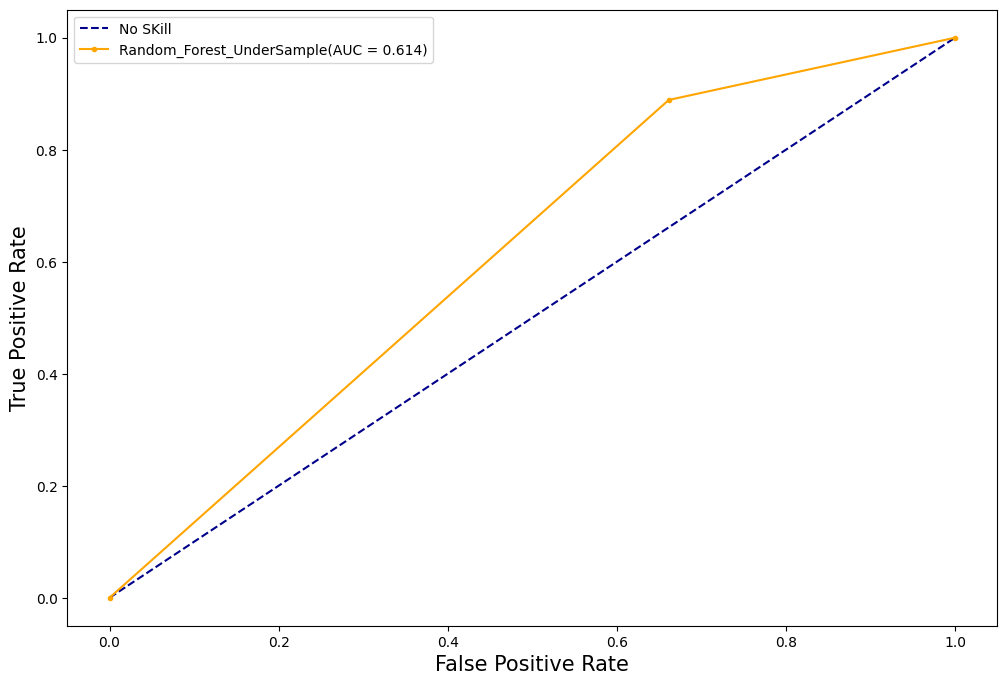




Precision-Recall Area Under the Curve Score for Training set: 0.7602149054438062



Precision-Recall Area Under the Curve Score for Testing set: 0.7576101773968797



Precision- Recall Curve


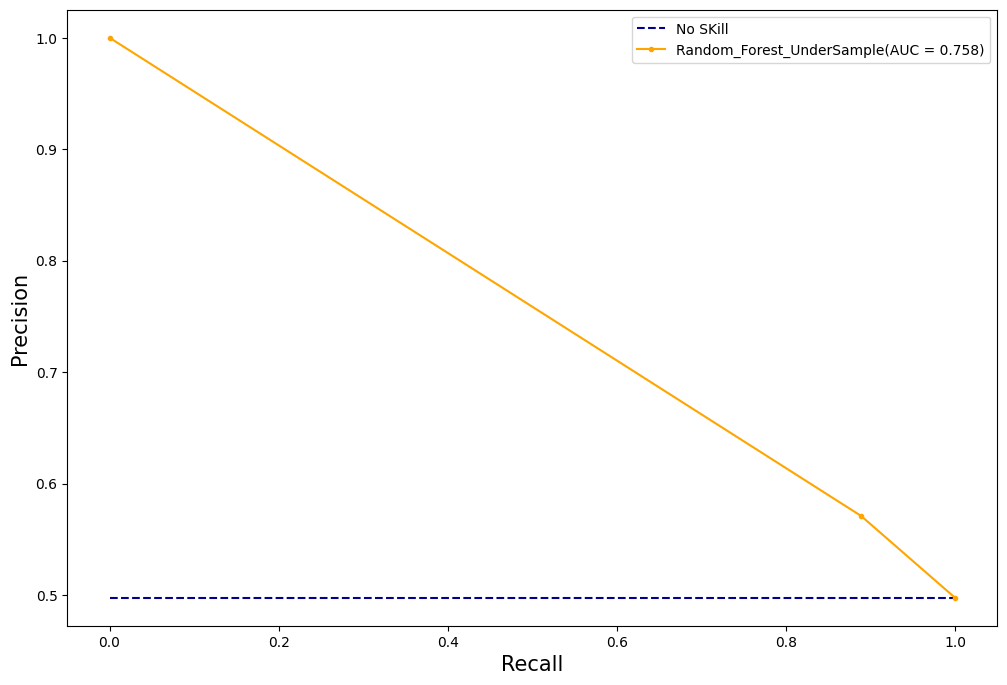

In [13]:
rf_params = {
    'n_estimators': [100, 200, 250],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

print("\nRunning Random Forest Model...")
Model_Driver_Function(X_UnderSample, y_UnderSample, 'Random_Forest_UnderSample', RandomForestClassifier(n_jobs=-1), rf_params, cv=5, n_iter=10)

**Using XGBoost Classifier**


Running XGBoost Model...
Fitting 5 folds for each of 35 candidates, totalling 175 fits



Best Model Hyper-parameters : {'reg_lambda': 1, 'n_estimators': 25, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.1}



Classification Report For Training set : 
               precision    recall  f1-score   support

           0       0.70      0.37      0.48     43732
           1       0.57      0.84      0.68     43909

    accuracy                           0.60     87641
   macro avg       0.63      0.60      0.58     87641
weighted avg       0.63      0.60      0.58     87641




Classification Report For Testing set : 
               precision    recall  f1-score   support

           0       0.69      0.36      0.48     18869
           1       0.57      0.84      0.68     18692

    accuracy                           0.60     37561
   macro avg       0.63      0.60      0.58     37561
weighted avg       0.63      0.60      0.58     37561




Confusion Matrix for Training Set :
 [[1

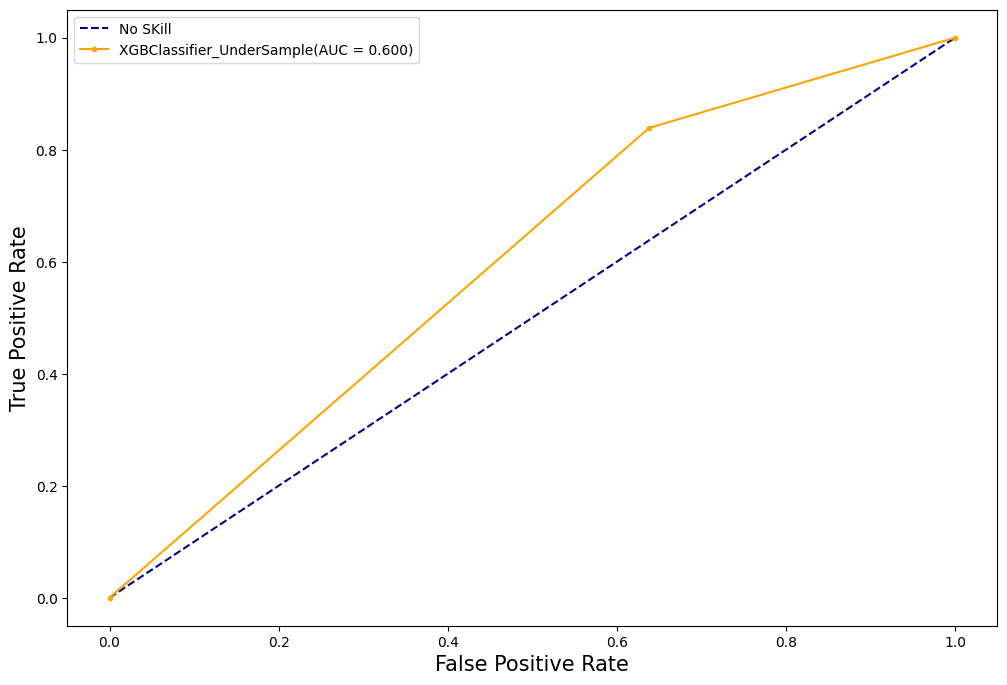




Precision-Recall Area Under the Curve Score for Training set: 0.7460632251891319



Precision-Recall Area Under the Curve Score for Testing set: 0.7423879145321556



Precision- Recall Curve


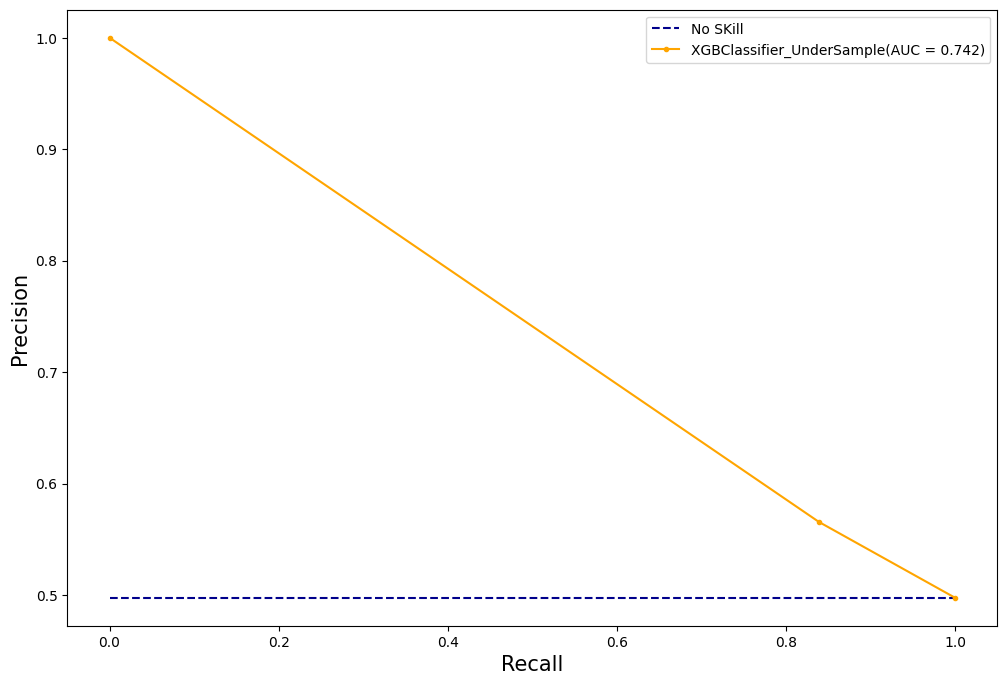

In [14]:
xgb_params  ={
    "learning_rate": [0.1, 0.01],
    "max_depth": [2,3],
    "n_estimators": [25, 50 ,70],
    "reg_lambda": [1, 2],
    "gamma": [0.1, 0.2],
}
print("\nRunning XGBoost Model...")
Model_Driver_Function(X_UnderSample, y_UnderSample,'XGBClassifier_UnderSample',XGBClassifier(n_jobs=-1, eval_metric=['auc']), xgb_params ,cv=5, n_iter=35)

**Using LightGBM Classifier**

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[LightGBM] [Info] Number of positive: 43909, number of negative: 43732
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010404 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 529
[LightGBM] [Info] Number of data points in the train set: 87641, number of used features: 108
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501010 -> initscore=0.004039
[LightGBM] [Info] Start training from score 0.004039
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

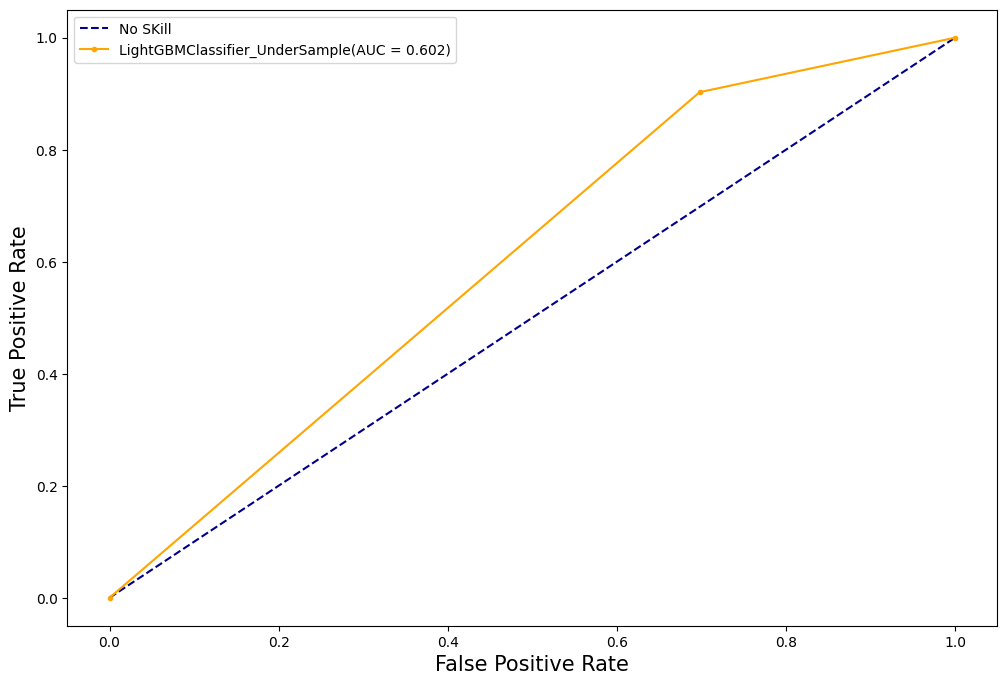




Precision-Recall Area Under the Curve Score for Training set: 0.7592926781915874



Precision-Recall Area Under the Curve Score for Testing set: 0.756401012678933



Precision- Recall Curve


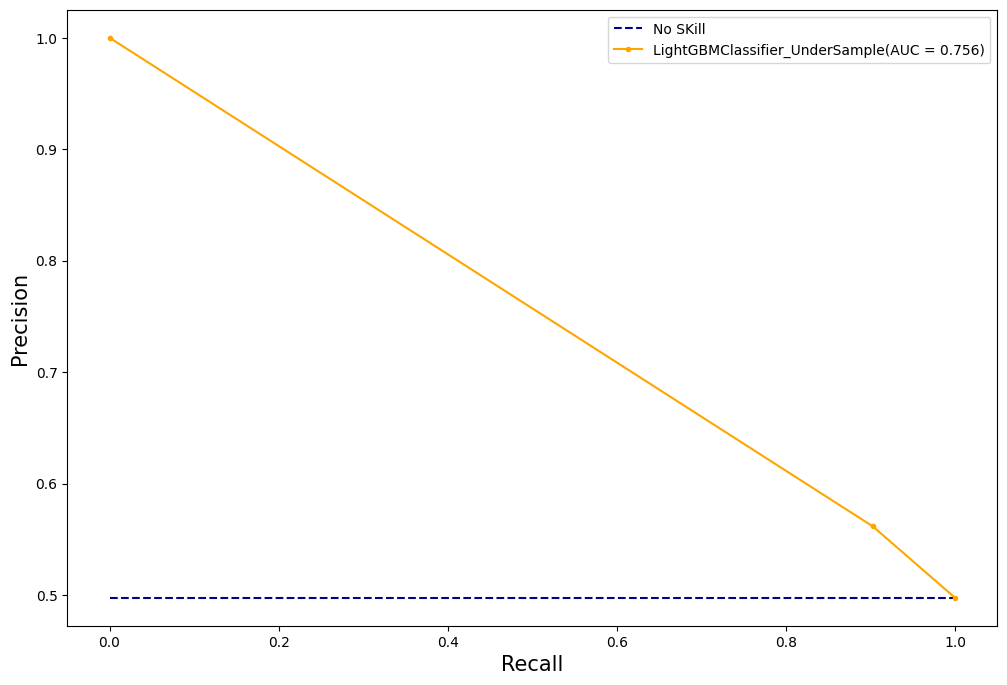

In [15]:
lightgGBM_params ={
  'num_iterations': [25, 50, 75],
  'learning_rate':[0.1, 0.01],
  'num_leaves':[15, 31, 63],
  'max_depth': [3, 5, 7],

}

Model_Driver_Function(X_UnderSample, y_UnderSample,'LightGBMClassifier_UnderSample', LGBMClassifier(), lightgGBM_params, cv=5, n_iter=25)